# 2種分類器：1.決策樹分類器2.k-Nearest Neighbors
## 學習地圖：練習 Python 的機器學習套件 scikit-learn，切分熟悉的鳶尾花資料成為訓練與測試資料，並建立了一個決策樹分類器以及一個 k-Nearest Neighbors 分類器，讓程式幫我們選擇合適的 k 值，並且與 R 語言相互對照。

## 決策樹分類器
## 決策樹分類器（Decision Tree Classifiers）是可以處理多元分類問題的演算法
### ---------------------------------------------------------------------------------------------------------------------------------------------------------------
## 2項優點:
### (1)可以同時處理連續型與類別型變數
### (2)不需要進行太多的資料預處理（Preprocessing），像是昨天我們在建立 Logistic 迴歸前得將 Pclass 與 Sex 這兩個變數創造成 dummy variables，但是決策樹分類器不需要


1.建模及預測分類

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.cross_validation import train_test_split

# 讀入鳶尾花資料
iris = load_iris()
iris_X = iris.data
iris_y = iris.target

# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, test_size = 0.3)

# 建立分類器
clf = tree.DecisionTreeClassifier()
iris_clf = clf.fit(train_X, train_y)

# 預測
test_y_predicted = iris_clf.predict(test_X)
print(test_y_predicted)

# 標準答案
print(test_y)

[2 0 0 0 0 0 1 0 1 1 0 2 1 1 2 2 1 1 0 2 0 2 0 1 0 0 1 1 0 0 1 0 2 2 2 1 0
 1 1 2 2 1 0 1 1]
[2 0 0 0 0 0 1 0 1 1 0 2 2 1 2 2 1 1 0 2 0 2 0 1 0 0 1 1 0 0 1 0 1 2 2 1 0
 1 2 2 2 1 0 1 2]


C:\Users\leo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


２.看正確率

In [4]:
# 預測
test_y_predicted = iris_clf.predict(test_X)

# 績效
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.955555555556


# k-Nearest Neighbors 分類器
### k-Nearest Neighbors 分類器同樣也是可以處理多元分類問題的演算法，由於是以距離作為未知類別的資料點分類依據，必須要將類別變數轉換為 dummy variables 然後將所有的數值型變數標準化，避免因為單位不同，在距離的計算上失真。

１.建模及預測

In [5]:
from sklearn.datasets import load_iris
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn import metrics

# 讀入鳶尾花資料
iris = load_iris()
iris_X = iris.data
iris_y = iris.target

# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, test_size = 0.3)

# 建立分類器
clf = neighbors.KNeighborsClassifier()
iris_clf = clf.fit(train_X, train_y)

# 預測
test_y_predicted = iris_clf.predict(test_X)
print(test_y_predicted)

# 標準答案
print(test_y)

[2 0 0 1 2 2 2 2 1 0 2 1 2 0 2 2 0 2 2 0 2 2 2 2 2 0 0 2 2 1 2 0 2 2 1 0 0
 1 2 1 1 1 2 0 1]
[2 0 0 1 2 2 2 2 1 0 2 1 2 0 2 2 0 2 2 0 2 2 2 2 2 0 0 2 1 1 2 0 2 2 1 0 0
 1 1 1 1 1 2 0 1]


2.讓程式幫我們選擇一個適合的 k，通常 k 的上限為訓練樣本數的 20%

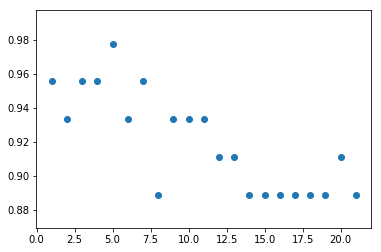

5


In [12]:
from sklearn.datasets import load_iris
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# 讀入鳶尾花資料
iris = load_iris()
iris_X = iris.data
iris_y = iris.target

# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, test_size = 0.3)

# 選擇 k
range = np.arange(1, round(0.2 * train_X.shape[0]) + 1)
accuracies = []

for i in range:
    clf = neighbors.KNeighborsClassifier(n_neighbors = i)
    iris_clf = clf.fit(train_X, train_y)
    test_y_predicted = iris_clf.predict(test_X)
    accuracy = metrics.accuracy_score(test_y, test_y_predicted)
    accuracies.append(accuracy)

# 視覺化
plt.scatter(range, accuracies)
plt.show()
appr_k = accuracies.index(max(accuracies)) + 1
print(appr_k)